# Kyphosis Surgery Success prediction


### Here the kyphosis column represents if the person still sufferss from the disease after getting the surgery.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('kyphosis.csv')

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Exploratory Data Analysis

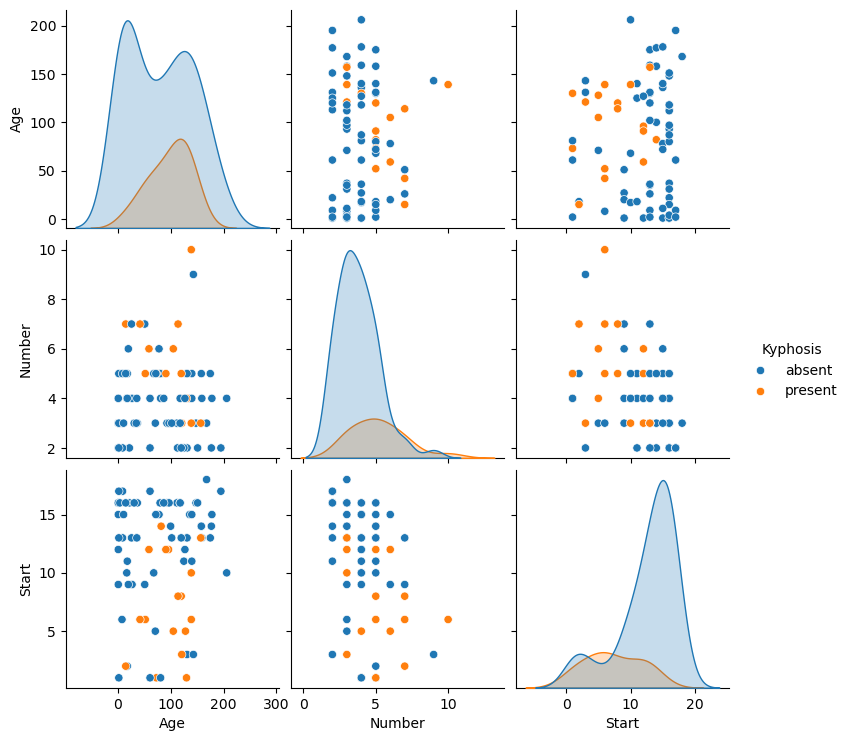

In [7]:
sns.pairplot(data,hue='Kyphosis')

## Prediction model and data splitting

In [8]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [9]:
X=data[['Age', 'Number', 'Start']]

In [10]:
y=data['Kyphosis']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree=DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
predictions=dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[15  4]
 [ 5  1]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.75      0.79      0.77        19
     present       0.20      0.17      0.18         6

    accuracy                           0.64        25
   macro avg       0.47      0.48      0.48        25
weighted avg       0.62      0.64      0.63        25



### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc=RandomForestClassifier(n_estimators=300)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [39]:
predict_rfc=rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predict_rfc))

[[19  0]
 [ 5  1]]


In [41]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



[[0 0]
 [0 0]]
